<font size=6><b>Lec01 : 금융관련 API 활용 </b></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)


# 증시 정보 관련 

<img src="https://avatars.githubusercontent.com/u/34187310?v=4">

## PyKRX
* 웹 싸이트 (Naver/KRX)에서 주가 정보 스크래핑
* 외국계 제공 x, 한국 거래소의 정보만
* ref : https://github.com/sharebook-kr/pykrx

----
* STOCK : MarketData, 인덱스, 공매도
* ETX : ETF, ETN, ELW
* 채권
* 채권 수익률
* 기타

In [2]:
# ! pip install pykrx

In [2]:
from pykrx import stock  # 주식  api
from pykrx import bond   # 채권  api

* Stock 모듈 - MarketData API

In [33]:
# tickers, symbol : 기업에 대한 코드나, 기업명 
tickers = stock.get_market_ticker_list("202201")   # 2021-01 해당 일자 코스피 상장된 ticker : 상패업종 따로 분리하지 않음(거래대금, 종가 =0 것들이 상패)
print(tickers[:5])

['095570', '006840', '027410', '282330', '138930']


In [48]:
# KONEX(코넥스) : 상장을 앞두고 있는 비상장주 -> 시장 외 거래, 예금자보호 받지 못함(위험)
tickers = stock.get_market_ticker_list("20190225", market="KOSDAQ") #KOSPI, KOSDAQ, KONEX
print(tickers[:5])

['060310', '054620', '265520', '211270', '035760']


- 코스피 : 코스닥  = 3 : 7
- 코스피: 대형주 / 코스닥: 기술주(변동성 큼), 동전주(몇백원)으로 주로 형성

-  면접 질문 
    - 코스피지수, 한국 상장 종목 개수, 코스피가 차지하는 비율 (약 30%)
    - 가장 핫한 뉴스
    - 입사하고자하는 회사의 주가는?

In [52]:
tickers = stock.get_market_ticker_list("2023", market="ALL") #KOSPI, KOSDAQ, KONEX
len(tickers)

2690

In [51]:
tickers = stock.get_market_ticker_list("20230426", market="KOSPI") #KOSPI, KOSDAQ, KONEX
len(tickers)

948

In [53]:
종목명 = stock.get_market_ticker_name('035760')
print(종목명)

CJ ENM


In [6]:
# o open, h high, l low, c close, v volume  
df = stock.get_market_ohlcv("2018-04-28", "2018-05-10", "005930") # (start, end, 종목) : start, end적어줄 경우 반드시 종목 적어야 함
                                                                  #                    : start만 주는 것은 가능(년, 년-월, 년-월-일)
print(df.head(3))

            시가  고가  저가     종가  거래량  거래대금  등락률
날짜                                           
2018-04-30   0   0   0  53000    0     0  0.0
2018-05-02   0   0   0  53000    0     0  0.0
2018-05-03   0   0   0  53000    0     0  0.0


In [35]:
stock.get_business_days(2022, 2)[:10]  # working day: 근무하는날 , 휴장일 확인 가능

[Timestamp('2022-02-03 00:00:00'),
 Timestamp('2022-02-04 00:00:00'),
 Timestamp('2022-02-07 00:00:00'),
 Timestamp('2022-02-08 00:00:00'),
 Timestamp('2022-02-09 00:00:00'),
 Timestamp('2022-02-10 00:00:00'),
 Timestamp('2022-02-11 00:00:00'),
 Timestamp('2022-02-14 00:00:00'),
 Timestamp('2022-02-15 00:00:00'),
 Timestamp('2022-02-16 00:00:00')]

* 해당 날짜 기준 종목 정보
* 대상 : etf, elw, market, index

In [8]:
stock.get_market_ticker_list(date='202201', market='KOSPI')[:3]

['095570', '006840', '027410']

In [9]:
stock.get_index_ticker_list(date='202201', market='KOSPI')[:3]

['1001', '1002', '1003']

* 네이버 주가정보 크롤링 정보 제공
* krx는 네이버 사이트 크롤링 해서 사용하기 때문

In [10]:
import time
ticker_list = stock.get_market_ticker_list(date='202201', market='KOSPI')[:3]
for ticker in ticker_list:
    print(stock.get_market_ticker_name(ticker))
    df = stock.get_market_ohlcv("20181210", "20181212", ticker)
    print(df.head())
    print("----" * 20)
    time.sleep(1)      #------ 무작위 크롤링시 차단 주의 !!!!

AJ네트웍스
              시가    고가    저가    종가     거래량       거래대금   등락률
날짜                                                         
2018-12-10  4840  4840  4670  4750   32310  152157715 -2.06
2018-12-11  4685  4750  4585  4585   37975  175311205 -3.47
2018-12-12  4605  4605  4520  4540  102752  466242595 -0.98
--------------------------------------------------------------------------------
AK홀딩스
               시가     고가     저가     종가    거래량        거래대금   등락률
날짜                                                             
2018-12-10  55400  56200  54900  55800  28618  1583487700  0.72
2018-12-11  55800  56200  54900  55100  24302  1343526800 -1.25
2018-12-12  55400  55900  54900  55900  13179   733026700  1.45
--------------------------------------------------------------------------------
BGF
              시가    고가    저가    종가     거래량        거래대금   등락률
날짜                                                          
2018-12-10  7900  8000  7830  7900  103028   813870860 -1.25
2018-12-11  7900  

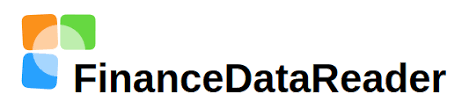

## FinanceDataReader
* 수정종가(Adjusted Price) : 총 발행 주식수의 변화를 반영한 가격
* 백테스트, 수익률 분석 시 반드시!!! 수정종가 사용  -->  주가 연속성 보장
* <font color=red><b>FinanceDataReader 모든 가격을 수정가격(Adjusted Price)로 제공</b></font><br><br>
* ref : https://github.com/FinanceData/FinanceDataReader

- Indexes: 'KS11'(코스피지수), 'KQ11'(코스닥지수), 'DJI'(다우존스지수), 'IXIC'(나스닥지수), 'US500'(S&P 500지수) 

- <b>종가(close)</b> : 시장이 마감되기 전 마지막으로 거래된 주가를 뜻하는데 
- <b>수정 종가(adjusted close)</b>: 해당 주식의 종가(close)에 분할(splits), 배당금 분배(dividend distributions) 등 <font color ='red'><b>주가에 영향을 미칠 수 있는 기업의 활동(corporate actions)을 반영한 후의 종가</b></font>

In [11]:
#### ! pip install finance-datareader

* 2018년 5월 4일, 삼성전자는 50:1로 액면분할

In [38]:
import FinanceDataReader as fdr

In [39]:
df = fdr.DataReader('005930', '2018-04-28', '2018-05-10', exchange='KRX') # exchange = '거래소 코드' -> 한국외의 거래소도 가능
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-04-30,0,0,0,53000,0,0.000000
2018-05-02,0,0,0,53000,0,0.000000
2018-05-03,0,0,0,53000,0,0.000000
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319
2018-05-10,51700,51700,50600,51600,13905263,0.013752


In [41]:
df.index

DatetimeIndex(['2018-04-30', '2018-05-02', '2018-05-03', '2018-05-04',
               '2018-05-08', '2018-05-09', '2018-05-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

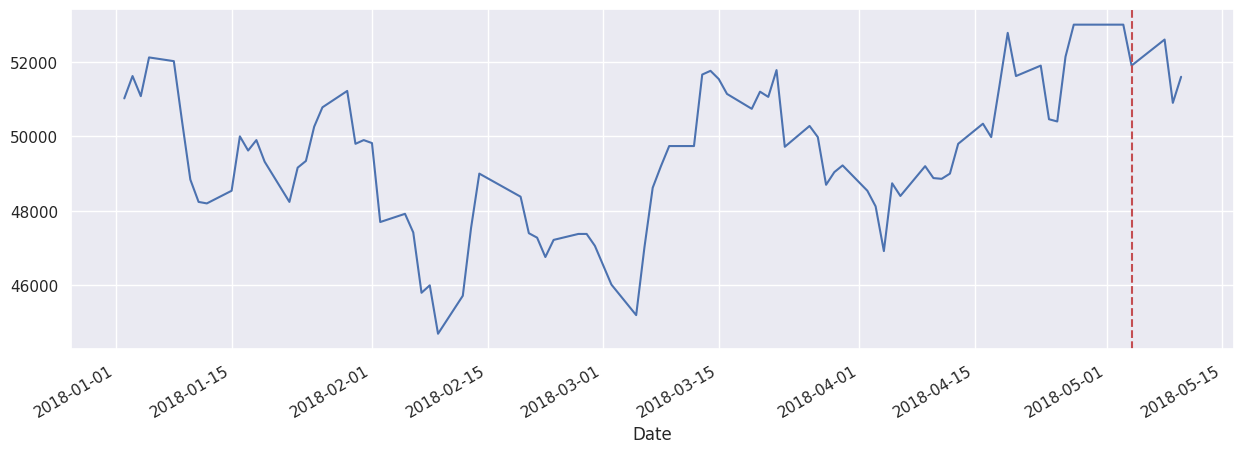

In [15]:
df = fdr.DataReader('005930', '2018-01-01', '2018-05-10')
ax = df['Close'].plot(figsize=(15,5))
ax.axvline('2018-05-04', ls='--', color='r')
plt.show()

In [89]:
#------------------------------------------------------------
# FX 환율, 1995 ~ 현재
#------------------------------------------------------------
usdkrw = fdr.DataReader('USD/KRW', '2022-01-01') # 달러 원화
usdeur = fdr.DataReader('USD/EUR', '1995-01-01') # 달러 유로화
usdcny = fdr.DataReader('USD/CNY', '1995-01-01') # 달러 위엔화


#------------------------------------------------------------
# 상품 선물 가격 데이터
#------------------------------------------------------------
df = fdr.DataReader('NG') # NG 천연가스 선물 (NYMEX)
df = fdr.DataReader('ZG') # 금 선물 (ICE)
df = fdr.DataReader('ZI') # 은 선물 (ICE)
# df = fdr.DataReader('HG') # 구리 선물 (COMEX)   # ----------------- X

#------------------------------------------------------------
# Bitcoin KRW price (Bithumbs), 2016 ~ Now
#------------------------------------------------------------
# btc = fdr.DataReader('BTC/KRW', '2016-01-01')

#------------------------------------------------------------
# 채권 수익률
#------------------------------------------------------------
# df = fdr.DataReader('KR1YT=RR') # 1년만기 한국국채 수익률
# df = fdr.DataReader('KR10YT=RR') # 10년만기 한국국채 수익률
# df = fdr.DataReader('US1MT=X') # 1개월 만기 미국국채 수익률
# df = fdr.DataReader('US10YT=X') # 10년 만기 미국국채 수익률

#------------------------------------------------------------
# stock symbol list
#------------------------------------------------------------
stock_df = fdr.StockListing('KRX')   # 코스피, 코스닥, 코넥스 전체
# stock_df = fdr.StockListing('KOSPI') # 코스피
# stock_df = fdr.StockListing('KOSDAQ') # 코스닥
# stock_df = fdr.StockListing('KONEX') # 코넥스
# stock_df = fdr.StockListing('NYSE')   # 뉴욕거래소
# stock_df = fdr.StockListing('NASDAQ') # 나스닥
# stock_df = fdr.StockListing('AMEX')   # 아멕스
# stock_df = fdr.StockListing('S&P500')
# stock_df = fdr.StockListing('SSE') # 상해 거래소
# stock_df = fdr.StockListing('SZSE') # 신천 거래소
# stock_df = fdr.StockListing('HKEX') # 홍콩거래소
# stock_df = fdr.StockListing('TSE') # 도쿄 증권거래소
# stock_df = fdr.StockListing('HOSE') # 호치민 증권거래소
# stock_df = fdr.StockListing('KRX-ADMINISTRATIVE') # 관리종목 리스트
# stock_df = fdr.StockListing('KRX-DELISTING')  # -----------상장폐지 종목 전체 리스트
print(stock_df)
#------------------------------------------------------------
# FRED 연준 데이터
#------------------------------------------------------------ 
# m2 = fdr.DataReader('M2', data_source='fred')                        #M2통화량     # data_source: 데이터 어디서 가져올래?(default='investing')
# nq = fdr.DataReader('NASDAQCOM', data_source='fred')                 # NASDAQCOM 나스닥종합지수
# hou_nas = fdr.DataReader(['HSN1F', 'NASDAQCOM'], data_source='fred') # HSN1F 주택판매지수, NASDAQCOM 나스닥종합지수 


        Code        ISU_CD      Name Market   Dept   Close ChangeCode  \
0     005930  KR7005930003      삼성전자  KOSPI          64100          1   
1     373220  KR7373220003  LG에너지솔루션  KOSPI         567000          1   
2     000660  KR7000660001    SK하이닉스  KOSPI          87400          1   
3     207940  KR7207940008  삼성바이오로직스  KOSPI         783000          2   
4     051910  KR7051910008      LG화학  KOSPI         727000          2   
...      ...           ...       ...    ...    ...     ...        ...   
2708  000547  KR7000542001   흥국화재2우B  KOSPI          16650          3   
2709  288490  KR7288490006     나라소프트  KONEX  일반기업부      60          2   
2710  135160  KR7135160000     무송지오씨  KONEX  일반기업부     200          2   
2711  308700  KR7308700004       테크엔  KONEX  일반기업부     372          1   
2712  322190  KR7322190000        베른  KONEX  일반기업부     123          5   

      Changes  ChagesRatio    Open    High     Low    Volume        Amount  \
0         500         0.79   63600   64300   

* 캔들차트 

In [76]:
# ! pip install --upgrade bokeh==2.4.3
# df = fdr.DataReader('005930', '2022-01-01', '2022-02-15')

# my_config = {'title':'fdr.chart.config()', 
#           # 'width': 600, 
#           # 'height': 300,
#           'volume': True,
# }
# fdr.chart.config(config=my_config)
# fdr.chart.plot(df) #, title='삼성전자(005930)')

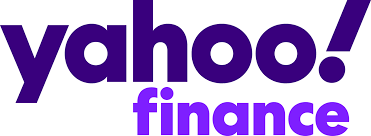

## yahoo finance
* ref : https://github.com/ranaroussi/yfinance/
* ref : https://pypi.org/project/yfinance/

In [29]:
##### ! pip install yfinance
# XXXXX #! pip install yahoo-finance  <구버전>

In [16]:
import yfinance as yf

In [17]:
msft = yf.Ticker("AAPL")  # AAPL : 애플

# get stock info
msft.info

# get historical market data
hist = msft.history(period="min")
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-25 00:00:00-04:00,165.190002,166.309998,163.729996,163.770004,48534900,0.0,0.0


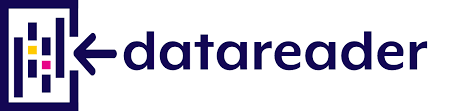

## pandas_datareader

In [18]:
#### ! pip install pandas_datareader

In [66]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [67]:
from datetime import datetime

start = datetime(2017,1,20)
end = datetime(2019,12,31)

# yf.pdr_override()
df_ss = pdr.get_data_yahoo('005930.KS',start, end)   # 홈페이지에서 막음     --> 직접 csv로 다운
df_ms = pdr.get_data_yahoo('MSFT', '2018-01-01', '2019-12-31')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [68]:
df_ss.info()
df_ss.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 717 entries, 2017-01-20 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       717 non-null    float64
 1   High       717 non-null    float64
 2   Low        717 non-null    float64
 3   Close      717 non-null    float64
 4   Adj Close  717 non-null    float64
 5   Volume     717 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 39.2 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-20,37120.0,37420.0,36880.0,37200.0,31506.033203,9185000
2017-01-23,37200.0,38060.0,37000.0,38060.0,32234.400391,8810400
2017-01-24,38120.0,38580.0,37880.0,38160.0,32319.093750,11048750
2017-01-25,38340.0,39400.0,38320.0,39400.0,33369.296875,13433850
2017-01-26,39420.0,40000.0,39420.0,39900.0,33792.765625,15214500


# 기술적 지표 관련 

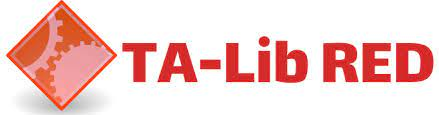

## TA-LIB

TA-LIB download ( TA_Lib‑0.4.24‑cp38‑cp38‑win_amd64.whl )
* 주식 보조 지표
* ref : https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib
* ref : https://github.com/mrjbq7/ta-lib

In [ ]:
# ! pip install TA_Lib-0.4.24-cp38-cp38-win_amd64.whl

In [22]:
import talib
import numpy
c = numpy.random.randn(100)

print(talib.STOCHRSI(c))

rsi = talib.RSI(c)
print(talib.STOCHF(rsi, rsi, rsi))
print(talib.RSI(c))


(array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
       100.        ,  10.74794297,   1.90417501,  90.1277579 ,
        56.84663058,  61.71266598,   0.        ,  36.19136391,
        97.60450881, 100.        ,  11.84673791,   0.        ,
        50.90875473,  30.9943834 , 100.        ,  93.93037078,
        53.97270661,  44.83813678,   0.        ,  34.87787597,
       100.        ,  63.70463129,  51.17529712,   0.        ,
        69.62454185, 100.        ,  18.84931364,  96.73011471,
        49.32585219,  52.23440949,  42.56976563,  65.85411179,
       100.        ,  44.71275052, 100.        , 100.        ,
        72.37169979,   0.        ,   0.        ,  11.75249247,
        62.40044282, 100.        , 100.        ,  74.9

# 증시 달력 관련
* https://open.krx.co.kr/contents/MKD/01/0110/01100305/MKD01100305.jsp
* https://github.com/rsheftel/pandas_market_calendars
* https://github.com/quantopian/trading_calendars
* https://github.com/gerrymanoim/exchange_calendars

## pykrx

In [23]:
from pykrx import stock
stock.get_business_days(2022, 2)

[Timestamp('2022-02-03 00:00:00'),
 Timestamp('2022-02-04 00:00:00'),
 Timestamp('2022-02-07 00:00:00'),
 Timestamp('2022-02-08 00:00:00'),
 Timestamp('2022-02-09 00:00:00'),
 Timestamp('2022-02-10 00:00:00'),
 Timestamp('2022-02-11 00:00:00'),
 Timestamp('2022-02-14 00:00:00'),
 Timestamp('2022-02-15 00:00:00'),
 Timestamp('2022-02-16 00:00:00'),
 Timestamp('2022-02-17 00:00:00'),
 Timestamp('2022-02-18 00:00:00'),
 Timestamp('2022-02-21 00:00:00'),
 Timestamp('2022-02-22 00:00:00'),
 Timestamp('2022-02-23 00:00:00'),
 Timestamp('2022-02-24 00:00:00'),
 Timestamp('2022-02-25 00:00:00'),
 Timestamp('2022-02-28 00:00:00')]

## pandas_market_calendars
* https://github.com/rsheftel/pandas_market_calendars/blob/master/docs/usage.rst

In [78]:
# ! pip install pandas_market_calendars

In [79]:
from datetime import time
import pandas as pd
import pandas_market_calendars as mcal

In [80]:
xkrx = mcal.get_calendar('XKRX')
xkrx.discontinued_market_times
print(xkrx.has_discontinued)
xkrx.remove_time("break_start")
xkrx.remove_time("break_end")
print(xkrx.has_discontinued)
cal_df = xkrx.schedule("2022-02-22", "2022-02-24")
cal_df.head()

True
False


,market_open,market_close
2022-02-22,2022-02-22 00:00:00+00:00,2022-02-22 06:30:00+00:00
2022-02-23,2022-02-23 00:00:00+00:00,2022-02-23 06:30:00+00:00
2022-02-24,2022-02-24 00:00:00+00:00,2022-02-24 06:30:00+00:00


## exchange_calendars
* ref : https://github.com/gerrymanoim/exchange_calendars

In [82]:
# ! pip install exchange_calendars

In [83]:
import exchange_calendars as xcals 
import datetime
import pandas as pd
print( xcals.get_calendar_names(include_aliases=False))

krx = xcals.get_calendar("XKRX") 
print(krx.is_session("2022-02-20"))   #일요일
print(krx.is_session(datetime.date.today().strftime("%Y-%m-%d"))) #오늘   개장여부

cal_df = krx.schedule.loc["2022-02-23":"2022-02-25"]
cal_df.head()


['24/5', '24/7', 'AIXK', 'ASEX', 'BVMF', 'CMES', 'IEPA', 'XAMS', 'XASX', 'XBKK', 'XBOG', 'XBOM', 'XBRU', 'XBSE', 'XBUD', 'XBUE', 'XCBF', 'XCSE', 'XDUB', 'XETR', 'XFRA', 'XHEL', 'XHKG', 'XICE', 'XIDX', 'XIST', 'XJSE', 'XKAR', 'XKLS', 'XKRX', 'XLIM', 'XLIS', 'XLON', 'XMAD', 'XMEX', 'XMIL', 'XMOS', 'XNYS', 'XNZE', 'XOSL', 'XPAR', 'XPHS', 'XPRA', 'XSES', 'XSGO', 'XSHG', 'XSTO', 'XSWX', 'XTAE', 'XTAI', 'XTKS', 'XTSE', 'XWAR', 'XWBO', 'us_futures']
False
True


,open,break_start,break_end,close
2022-02-23,2022-02-23 00:00:00+00:00,NaT,NaT,2022-02-23 06:30:00+00:00
2022-02-24,2022-02-24 00:00:00+00:00,NaT,NaT,2022-02-24 06:30:00+00:00
2022-02-25,2022-02-25 00:00:00+00:00,NaT,NaT,2022-02-25 06:30:00+00:00


In [84]:
cal_df = krx.sessions_in_range("2022-01-01", "2022-01-10")
cal_df

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10'],
              dtype='datetime64[ns]', freq='C')

In [85]:
print("이전개장일", krx.previous_session("2022-02-21")) #월요일
print("다음개장일", krx.next_session("2022-02-21"))     #

이전개장일 2022-02-18 00:00:00
다음개장일 2022-02-22 00:00:00


In [86]:
! ecal XKRX 1 2022

        January 2022
 Su  Mo  Tu  We  Th  Fr  Sa
                        [ 1]
[ 2]  3   4   5   6   7 [ 8]
[ 9] 10  11  12  13  14 [15]
[16] 17  18  19  20  21 [22]
[23] 24  25  26  27  28 [29]
[30][31]



C:\AI\pythonProject2\venv\lib\site-packages\exchange_calendars\ecal.py:44: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  days = pd.date_range(start, end, closed="left")


In [87]:
! ecal XKRX 2022

                                          2022
          January                        February                        March
 Su  Mo  Tu  We  Th  Fr  Sa     Su  Mo  Tu  We  Th  Fr  Sa     Su  Mo  Tu  We  Th  Fr  Sa
                        [ 1]           [ 1][ 2]  3   4 [ 5]           [ 1]  2   3   4 [ 5]
[ 2]  3   4   5   6   7 [ 8]   [ 6]  7   8   9  10  11 [12]   [ 6]  7   8 [ 9] 10  11 [12]
[ 9] 10  11  12  13  14 [15]   [13] 14  15  16  17  18 [19]   [13] 14  15  16  17  18 [19]
[16] 17  18  19  20  21 [22]   [20] 21  22  23  24  25 [26]   [20] 21  22  23  24  25 [26]
[23] 24  25  26  27  28 [29]   [27] 28                        [27] 28  29  30  31
[30][31]

           April                           May                            June
 Su  Mo  Tu  We  Th  Fr  Sa     Su  Mo  Tu  We  Th  Fr  Sa     Su  Mo  Tu  We  Th  Fr  Sa
                      1 [ 2]                                              [ 1]  2   3 [ 4]
[ 3]  4   5   6   7   8 [ 9]   [ 1]  2   3   4 [ 5]  6 [ 7]   [ 5][ 

C:\AI\pythonProject2\venv\lib\site-packages\exchange_calendars\ecal.py:44: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  days = pd.date_range(start, end, closed="left")


# finterstellar
- backtesting 
- chart